In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('../')
pd.set_option('display.max_columns', 100)

In [2]:
folders = [
    ('SM_1H_K2',11,"CSNN"),
    #'SM_1H_K3',
    #'SM_1H_K4',
    #'SM_1H_K5',
    ('MM_1H_K2',15,"CSNN"),
    #'MM_1H_K3',
    #'MM_1H_K4',
    #'MM_1H_K5',
    ('LM_1H_K2',23,"CSNN"),
    #'LM_1H_K3',
    #'LM_1H_K4',
    #'LM_1H_K5',
    # 2h
    #'SM_2H_K2',
    ('SM_2H_K3',16,"CSNN"),
    #'SM_2H_K4',
    ('MM_2H_K2',9,"CSNN"),
    #'MM_2H_K3',
    #'MM_2H_K4',
    #'LM_2H_K2',
    ('LM_2H_K3',23,"CSNN"),
    #'LM_2H_K4',
    # 3h
    ('SM_3H_K2',21,"CSNN"),
    ('MM_3H_K2',22,"CSNN"),
    ('LM_3H_K2',10,"CSNN"),
    # FFSNN
    ("FFSNN_1H",22,"FFSNN"),
    ("FFSNN_2H",25,"FFSNN"),
    ("FFSNN_3H",21,"FFSNN"),
    # CNN
    ("CNN_1H",1,"CNN"),
    ("CNN_2H",1,"CNN"),
    ("CNN_3H",1,"CNN"),
    # LFNN
    ("FFNN_1H",1,"FFNN"),
    ("FFNN_2H",1,"FFNN"),
    ("FFNN_3H",1,"FFNN"),
]

dfs = []
for f, steps, type in folders:
    results_df = pd.read_csv(f'../results/{f}.csv')
    model = f.split('-')[0]
    results_df['model'] = model
    results_df['steps'] = steps
    results_df['type'] = type
    dfs.append(results_df)
    print(f'Loaded {f} – {len(results_df)} results')
len(dfs)

Loaded SM_1H_K2 – 600 results
Loaded MM_1H_K2 – 600 results
Loaded LM_1H_K2 – 600 results
Loaded SM_2H_K3 – 600 results
Loaded MM_2H_K2 – 600 results
Loaded LM_2H_K3 – 600 results
Loaded SM_3H_K2 – 600 results
Loaded MM_3H_K2 – 600 results
Loaded LM_3H_K2 – 600 results
Loaded FFSNN_1H – 600 results
Loaded FFSNN_2H – 600 results
Loaded FFSNN_3H – 600 results
Loaded CNN_1H – 600 results
Loaded CNN_2H – 600 results
Loaded CNN_3H – 600 results
Loaded FFNN_1H – 600 results
Loaded FFNN_2H – 600 results
Loaded FFNN_3H – 600 results


18

In [3]:
results_df = pd.concat(dfs)
results_df = results_df[['type', 'dataset','recall', 'fpr_ratio_age', 'fpr_ratio_income', 'fpr_ratio_employment']]
#drop equal to 0
results_df = results_df[results_df['fpr_ratio_age'] > 0]
results_df = results_df[results_df['fpr_ratio_income'] > 0]
results_df = results_df[results_df['fpr_ratio_employment'] > 0]
#results_df = results_df[results_df['recall'] > 0]
# rename type to model
results_df = results_df.rename(columns={'type': 'model'})
results_df

,model,dataset,recall,fpr_ratio_age,fpr_ratio_income,fpr_ratio_employment
0,CSNN,Base,0.287352,0.941583,0.949325,0.994285
6,CSNN,Base,0.282140,0.915579,0.979398,0.966276
7,CSNN,Variant I,0.394024,0.932979,0.990594,0.939018
14,CSNN,Variant II,0.364837,0.988380,0.982697,0.999142
17,CSNN,Variant V,0.401207,0.960843,0.960697,0.986239
...,...,...,...,...,...,...
475,FFNN,Variant I,0.084086,0.954199,0.980689,0.943510
498,FFNN,Base,0.151494,0.993911,0.978027,0.925767
506,FFNN,Variant II,0.000347,0.851834,0.891328,0.837862
511,FFNN,Variant I,0.211258,0.932290,0.992346,0.960868


In [4]:
mean = results_df.groupby(['model']).aggregate({
    'recall': ['mean', 'std'],
    'fpr_ratio_age': ['mean', 'std'],
    'fpr_ratio_income': ['mean', 'std'],
    'fpr_ratio_employment': ['mean', 'std'],
}).reset_index()
mean

model    recall           fpr_ratio_age           fpr_ratio_income  \
              mean       std          mean       std             mean   
0    CNN  0.232703  0.143790      0.916640  0.175428         0.914412   
1   CSNN  0.361784  0.083436      0.977541  0.022684         0.977455   
2   FFNN  0.074503  0.062518      0.907976  0.148201         0.911409   
3  FFSNN  0.117968  0.048960      0.969664  0.033667         0.969789   

            fpr_ratio_employment            
        std                 mean       std  
0  0.171489             0.863057  0.223098  
1  0.025115             0.964517  0.035995  
2  0.149242             0.892034  0.164442  
3  0.037338             0.952092  0.054792

In [5]:
df_age = results_df[['model', 'dataset', 'recall', 'fpr_ratio_age']]
df_income = results_df[['model', 'dataset', 'recall', 'fpr_ratio_income']]
df_employment = results_df[['model', 'dataset', 'recall', 'fpr_ratio_employment']]
dfs = [(df_age, 'age'), (df_income, 'income'), (df_employment, 'employment')]
dfs

[(    model      dataset    recall  fpr_ratio_age
  0    CSNN         Base  0.287352       0.941583
  6    CSNN         Base  0.282140       0.915579
  7    CSNN    Variant I  0.394024       0.932979
  14   CSNN   Variant II  0.364837       0.988380
  17   CSNN    Variant V  0.401207       0.960843
  ..    ...          ...       ...            ...
  475  FFNN    Variant I  0.084086       0.954199
  498  FFNN         Base  0.151494       0.993911
  506  FFNN   Variant II  0.000347       0.851834
  511  FFNN    Variant I  0.211258       0.932290
  555  FFNN  Variant III  0.088612       0.990879
  
  [4118 rows x 4 columns],
  'age'),
 (    model      dataset    recall  fpr_ratio_income
  0    CSNN         Base  0.287352          0.949325
  6    CSNN         Base  0.282140          0.979398
  7    CSNN    Variant I  0.394024          0.990594
  14   CSNN   Variant II  0.364837          0.982697
  17   CSNN    Variant V  0.401207          0.960697
  ..    ...          ...       ...        

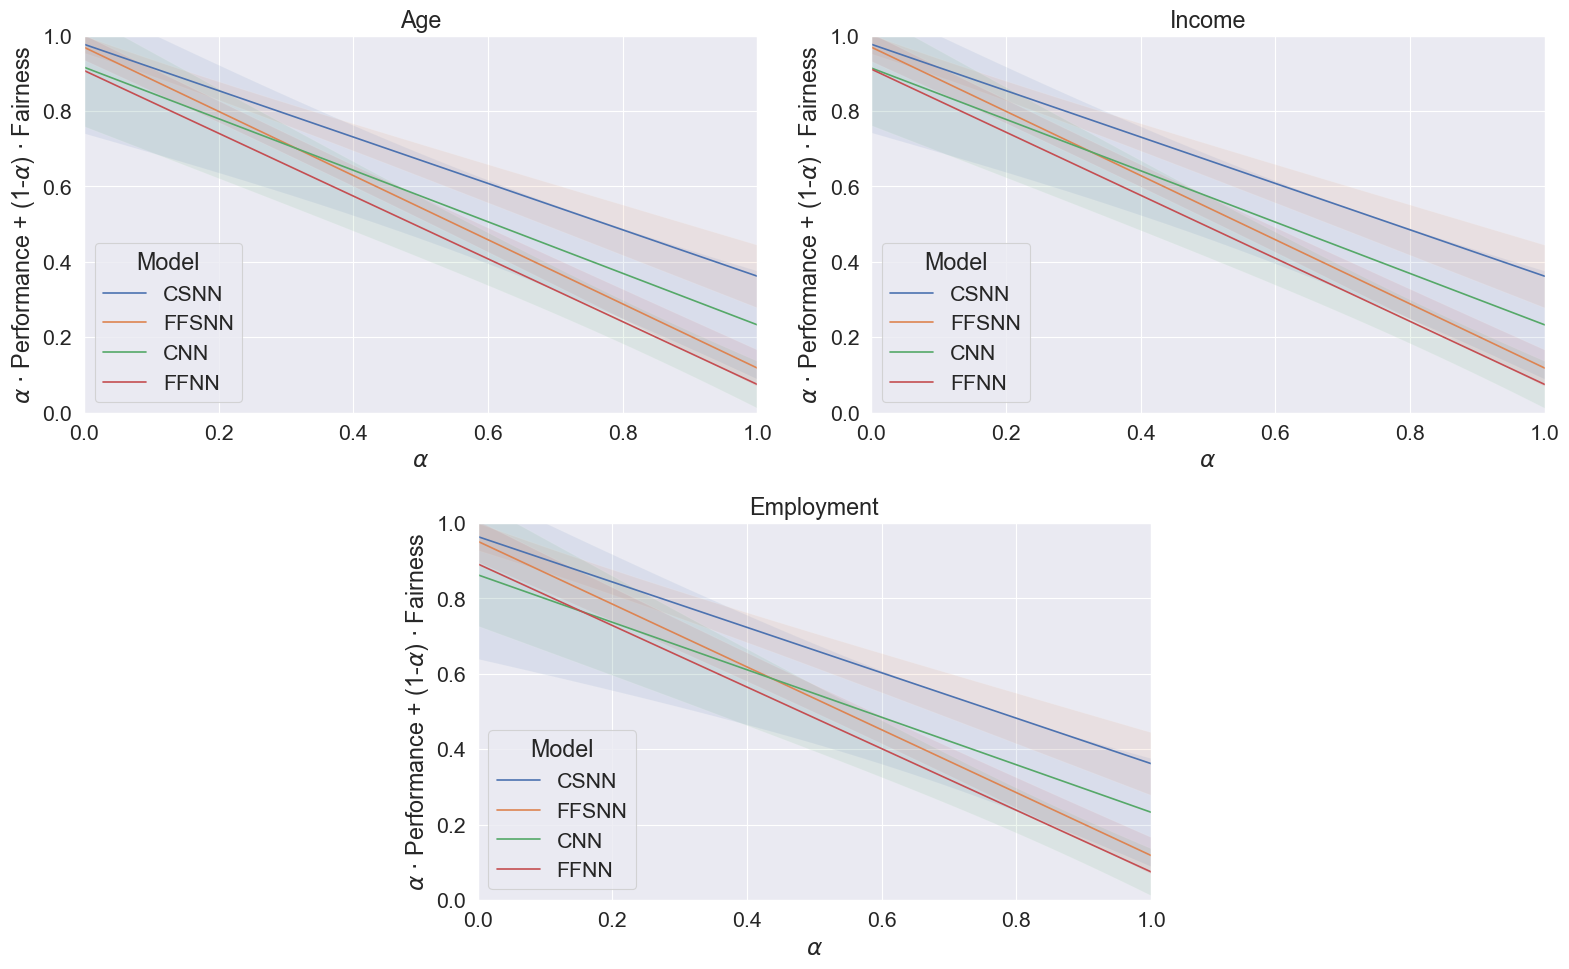

In [6]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import pandas as pd

sns.set_theme(style="darkgrid")
sns.set_context("paper", font_scale=1.75)

fig = plt.figure(figsize=(16, 10))
gs = gridspec.GridSpec(2, 4, figure=fig)  # 2 rows, 4 columns

# Top row: ax1 and ax2 each take 1 column (25%)
ax1 = fig.add_subplot(gs[0, :2])
ax2 = fig.add_subplot(gs[0, 2:])

# Bottom row: ax3 spans middle 50% (columns 1 and 2)
ax3 = fig.add_subplot(gs[1, 1:3])  # spans columns 1 and 2 (25%–75%)

axes = [ax1, ax2, ax3]

for i, (df, attr) in enumerate(dfs[:3]):
    tradeoff_list = []
    for model in df['model'].unique():
        model_df = df[df['model'] == model]
        for alpha in range(0, 101):
            alpha = alpha / 100
            tradeoff = alpha * model_df["recall"].mean() + (1 - alpha) * model_df[f'fpr_ratio_{attr}'].mean()
            std_dev = ((alpha * model_df["recall"]).std()**2 + ((1 - alpha) * model_df[f'fpr_ratio_{attr}']).std()**2)**0.5
            tradeoff_list.append({
                "model": model,
                "alpha": alpha,
                "tradeoff": tradeoff,
                "std_dev": std_dev
            })

    tradeoff_df = pd.DataFrame(tradeoff_list)
    ax = axes[i]
    sns.lineplot(data=tradeoff_df, x="alpha", y="tradeoff", hue="model", ax=ax)
    for name, group in tradeoff_df.groupby("model"):
        ax.fill_between(group['alpha'], group['tradeoff'] - group['std_dev'], group['tradeoff'] + group['std_dev'], alpha=0.1)
    ax.legend(title="Model", loc="lower left")
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_xlabel(r"$\alpha$")
    ax.set_ylabel(r"$\alpha$ $\cdot$ Performance + (1-$\alpha$) $\cdot$ Fairness")
    ax.set_title(attr.capitalize())

plt.tight_layout()
plt.show()

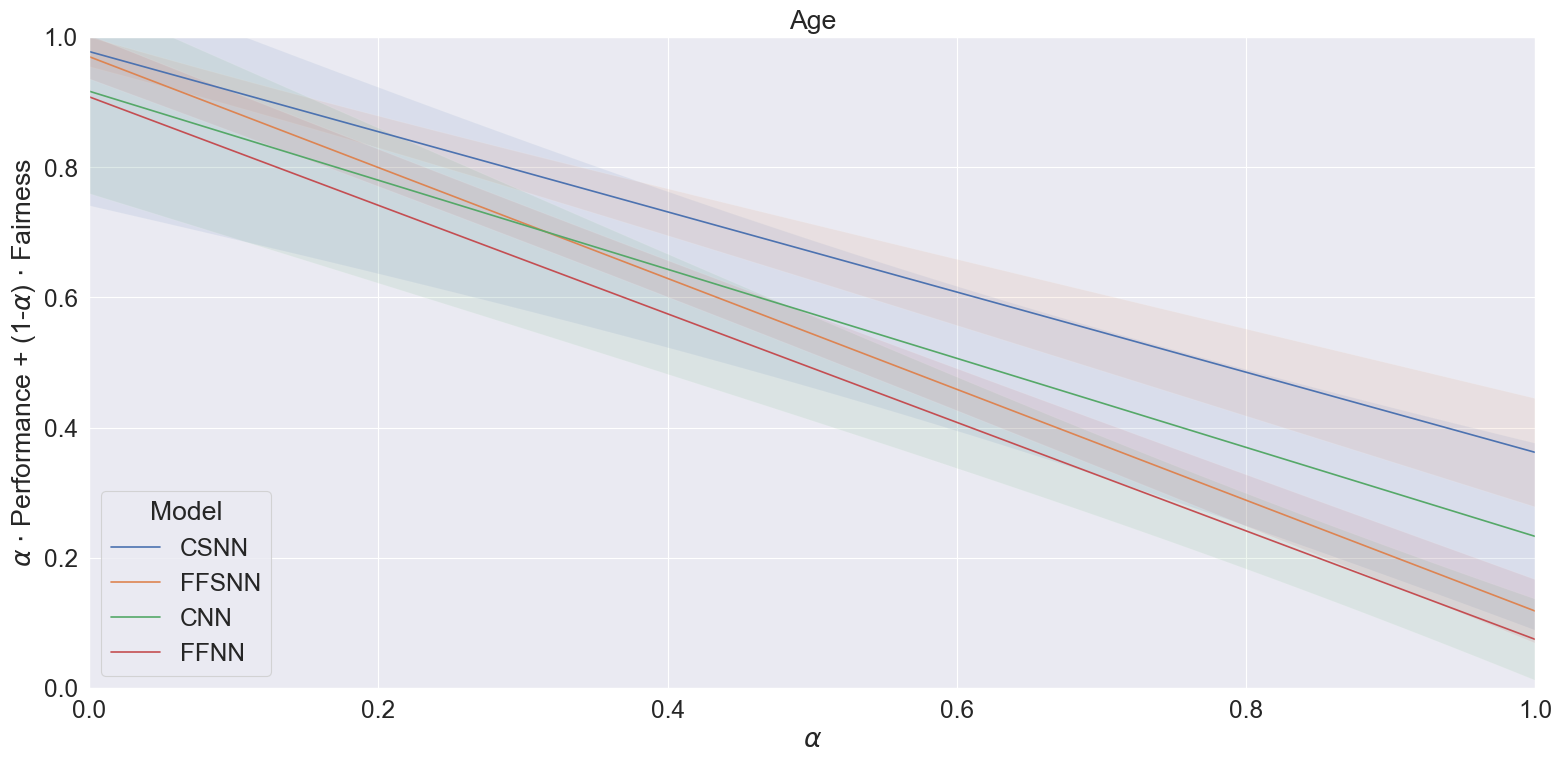

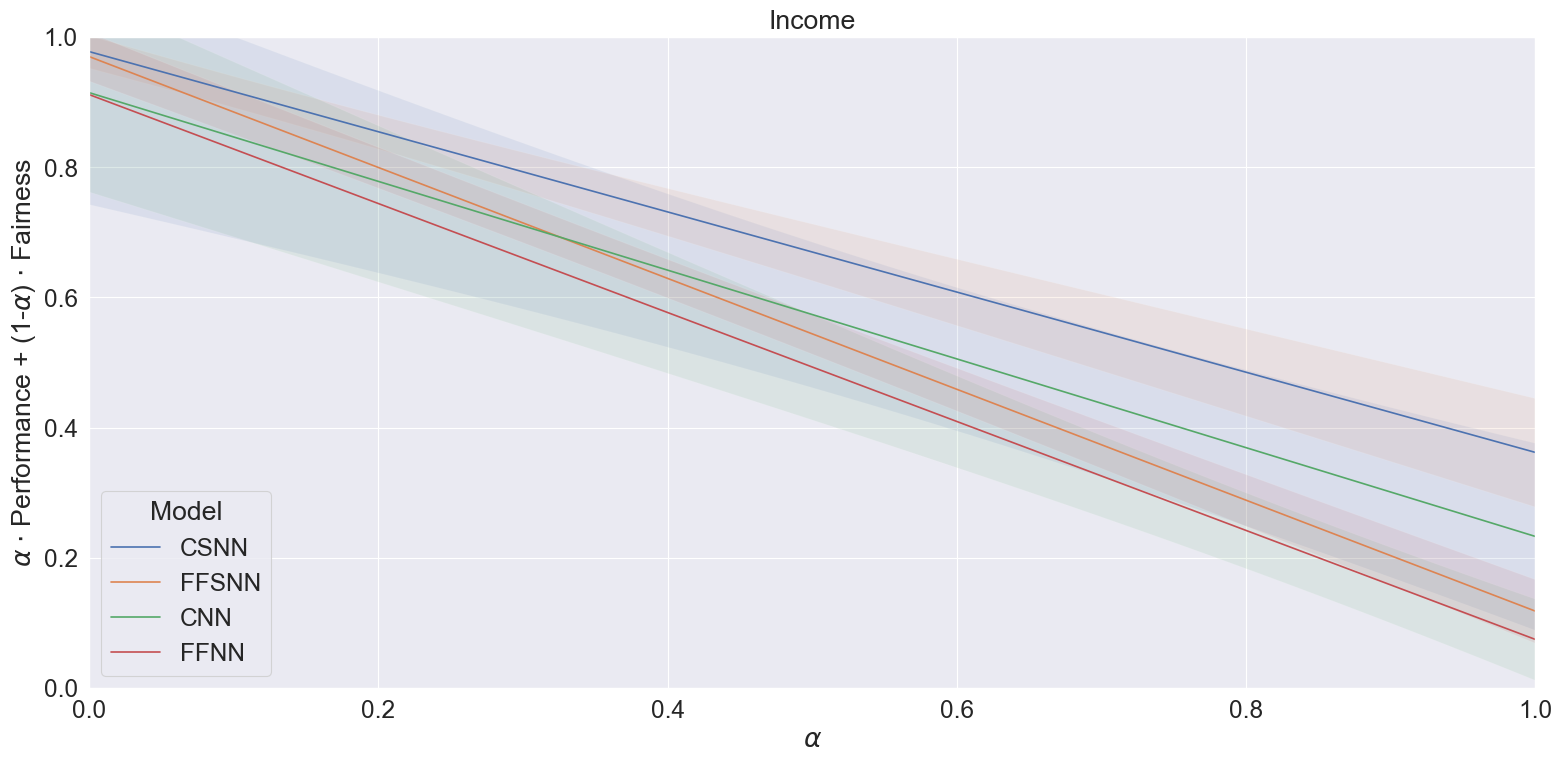

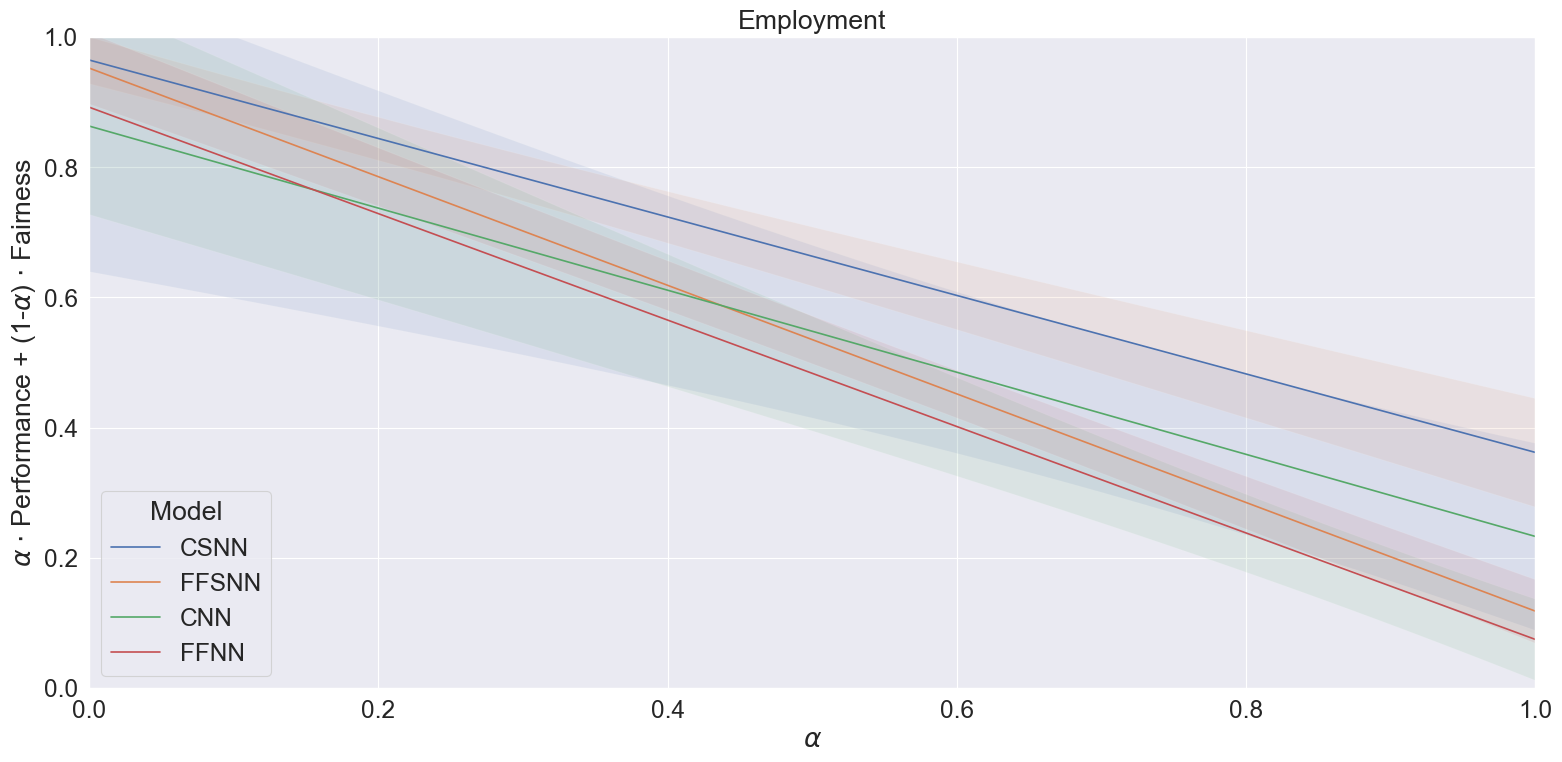

In [7]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import pandas as pd

sns.set_theme(style="darkgrid")
sns.set_context("paper", font_scale=2)

for i, (df, attr) in enumerate(dfs[:3]):
    tradeoff_list = []
    for model in df['model'].unique():
        model_df = df[df['model'] == model]
        for alpha in range(0, 101):
            alpha = alpha / 100
            tradeoff = alpha * model_df["recall"].mean() + (1 - alpha) * model_df[f'fpr_ratio_{attr}'].mean()
            std_dev = ((alpha * model_df["recall"]).std()**2 + ((1 - alpha) * model_df[f'fpr_ratio_{attr}']).std()**2)**0.5
            tradeoff_list.append({
                "model": model,
                "alpha": alpha,
                "tradeoff": tradeoff,
                "std_dev": std_dev
            })

    tradeoff_df = pd.DataFrame(tradeoff_list)
    fig = plt.figure(figsize=(16, 8))
    ax = plt.gca()
    sns.lineplot(data=tradeoff_df, x="alpha", y="tradeoff", hue="model", ax=ax)
    for name, group in tradeoff_df.groupby("model"):
        ax.fill_between(group['alpha'], group['tradeoff'] - group['std_dev'], group['tradeoff'] + group['std_dev'], alpha=0.1)
    ax.legend(title="Model", loc="lower left")
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_xlabel(r"$\alpha$")
    ax.set_ylabel(r"$\alpha$ $\cdot$ Performance + (1-$\alpha$) $\cdot$ Fairness")
    ax.set_title(attr.capitalize())
    plt.tight_layout()
    plt.show()